In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [3]:
movie = pd.read_csv('Netflix_Dataset_Movie.csv')
rating = pd.read_csv('Netflix_Dataset_Rating.csv')

In [4]:
print(movie.head())
print(rating.head())

   Movie_ID  Year                          Name
0         1  2003               Dinosaur Planet
1         2  2004    Isle of Man TT 2004 Review
2         3  1997                     Character
3         4  1994  Paula Abdul's Get Up & Dance
4         5  2004      The Rise and Fall of ECW
   User_ID  Rating  Movie_ID
0   712664       5         3
1  1331154       4         3
2  2632461       3         3
3    44937       5         3
4   656399       4         3


In [5]:
data = pd.merge(movie, rating, on = 'Movie_ID')
data

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [6]:
data.isnull().sum()

Movie_ID    0
Year        0
Name        0
User_ID     0
Rating      0
dtype: int64

In [7]:
eda_describtion = data.groupby('Name')['Rating'].describe()
eda_describtion

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
10,4644.0,3.113049,0.949925,1.0,3.0,3.0,4.0,5.0
10 Things I Hate About You,38465.0,3.703471,0.966765,1.0,3.0,4.0,4.0,5.0
101 Dalmatians II: Patch's London Adventure,5622.0,3.528282,0.957094,1.0,3.0,4.0,4.0,5.0
11:14,1699.0,3.260153,0.940207,1.0,3.0,3.0,4.0,5.0
13 Ghosts,6560.0,3.595732,1.128427,1.0,3.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Yojimbo,8968.0,4.021298,1.020747,1.0,4.0,4.0,5.0,5.0
Young Black Stallion,1592.0,3.259422,0.973521,1.0,3.0,3.0,4.0,5.0
Youngblood,3000.0,3.273667,1.021659,1.0,3.0,3.0,4.0,5.0


Text(0, 0.5, 'Rating Mean')

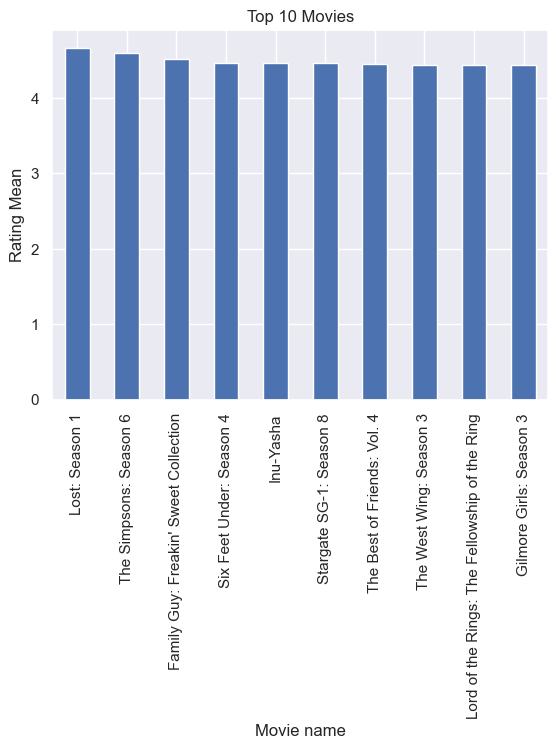

In [9]:
eda_describtion['mean'].sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Movies')
plt.xlabel('Movie name')
plt.ylabel('Rating Mean')

Text(0, 0.5, 'Rating count')

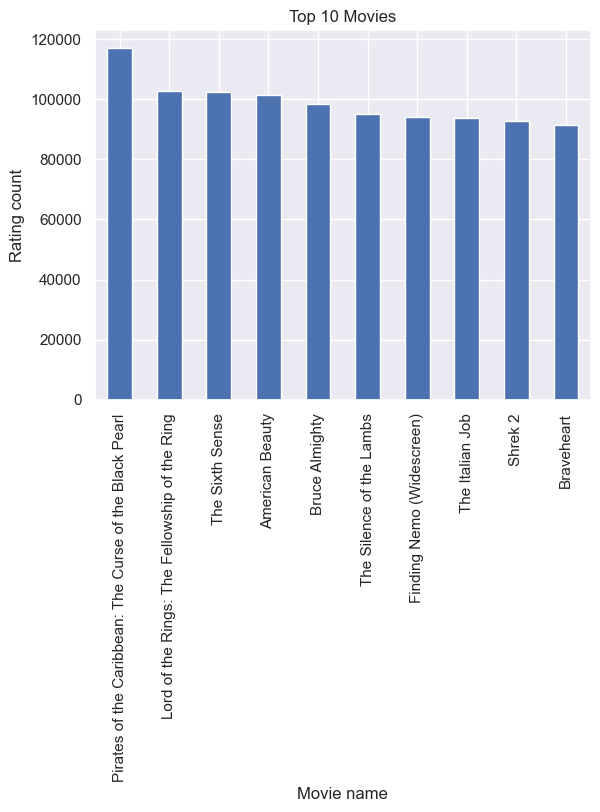

In [10]:
eda_describtion['count'].sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Movies')
plt.xlabel('Movie name')
plt.ylabel('Rating count')

In [11]:
eda_describtion.index

Index(['10', '10 Things I Hate About You',
       '101 Dalmatians II: Patch's London Adventure', '11:14', '13 Ghosts',
       '18 Again', '1984', '2 Fast 2 Furious', '200 Cigarettes',
       '2010: The Year We Make Contact',
       ...
       'Xena: Warrior Princess: Season 3',
       'Xena: Warrior Princess: Series Finale', 'Y Tu Mama Tambien',
       'Yellow Submarine', 'Yi Yi', 'Yojimbo', 'Young Black Stallion',
       'Youngblood', 'Yu-Gi-Oh!: The Movie', 'Zorro'],
      dtype='object', name='Name', length=1342)

In [16]:
result = eda_describtion['count'].sort_values(ascending = False).index == eda_describtion['mean'].sort_values(ascending = True).index
result.all()

np.False_